In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

ticker = "AMZN"
df = yf.download(ticker, start="2021-01-02", end="2022-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,163.500000,163.600006,157.201004,159.331497,159.331497,88228000
2021-01-05,158.300507,161.169006,158.253006,160.925507,160.925507,53110000
2021-01-06,157.324005,159.875504,156.557999,156.919006,156.919006,87896000
2021-01-07,157.850006,160.427002,157.750000,158.108002,158.108002,70290000
2021-01-08,159.000000,159.531998,157.110001,159.134995,159.134995,70754000


In [2]:
df_filter = df[["Adj Close"]]
df_filter.rename(columns={"Adj Close": "price_t"}, inplace=True)
df_filter.head()

,price_t
Date,
2021-01-04,159.331497
2021-01-05,160.925507
2021-01-06,156.919006
2021-01-07,158.108002
2021-01-08,159.134995


In [3]:
df_filter["price_t-1"] = df_filter["price_t"].shift(1)
df_filter

,price_t,price_t-1
Date,,
2021-01-04,159.331497,NaN
2021-01-05,160.925507,159.331497
2021-01-06,156.919006,160.925507
2021-01-07,158.108002,156.919006
2021-01-08,159.134995,158.108002
...,...,...
2022-12-23,85.250000,83.790001
2022-12-27,83.040001,85.250000
2022-12-28,81.820000,83.040001


In [4]:
df_filter["returns"] = (df_filter["price_t"]/ df_filter["price_t-1"]) - 1
df_filter

,price_t,price_t-1,returns
Date,,,
2021-01-04,159.331497,NaN,NaN
2021-01-05,160.925507,159.331497,0.010004
2021-01-06,156.919006,160.925507,-0.024897
2021-01-07,158.108002,156.919006,0.007577
2021-01-08,159.134995,158.108002,0.006496
...,...,...,...
2022-12-23,85.250000,83.790001,0.017425
2022-12-27,83.040001,85.250000,-0.025924
2022-12-28,81.820000,83.040001,-0.014692


In [5]:
df_filter["returns_inbuilt"] = df_filter["price_t"].pct_change()
df_filter

,price_t,price_t-1,returns,returns_inbuilt
Date,,,,
2021-01-04,159.331497,NaN,NaN,NaN
2021-01-05,160.925507,159.331497,0.010004,0.010004
2021-01-06,156.919006,160.925507,-0.024897,-0.024897
2021-01-07,158.108002,156.919006,0.007577,0.007577
2021-01-08,159.134995,158.108002,0.006496,0.006496
...,...,...,...,...
2022-12-23,85.250000,83.790001,0.017425,0.017425
2022-12-27,83.040001,85.250000,-0.025924,-0.025924
2022-12-28,81.820000,83.040001,-0.014692,-0.014692


<AxesSubplot:xlabel='Date'>

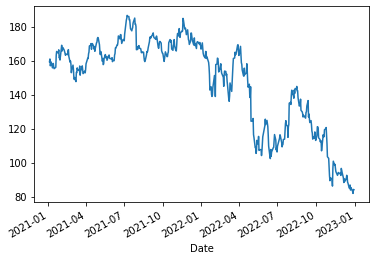

In [6]:
df_filter["price_t"].plot()

<AxesSubplot:xlabel='Date'>

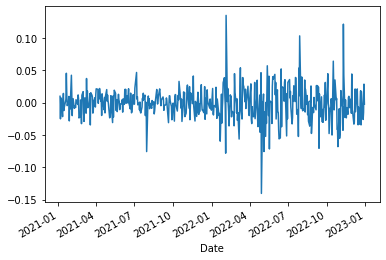

In [7]:
df_filter["returns"].plot()